In [1]:
import pandas as pd
data = pd.read_csv('/home/gabriel/Desktop/Machine Learning A-Z Template Folder/Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv') 

X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

#### Simple linear regression in sckitlearn

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [3]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

X_single_data = [[4.6]]
y_single_pred = regressor.predict(X_single_data)

In [4]:
print(f'Train score: {regressor.score(X_train, y_train)}')
print(f'Test  score: {regressor.score(X_test, y_test)}')

Train score: 0.960775692121653
Test  score: 0.9248580247217076


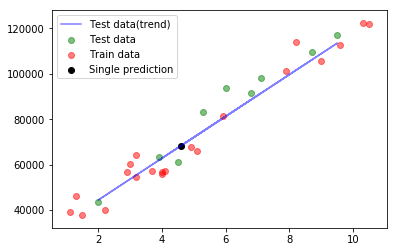

In [6]:
import matplotlib.pyplot as plt

splt = plt.subplot()
splt.plot(X_test, y_pred, color='blue', alpha=0.5, label='Test data(trend)')
splt.scatter(X_test, y_test, color='green', alpha=0.5, label='Test data')
splt.scatter(X_train, y_train, color='red', alpha=0.5, label='Train data')
splt.scatter(X_single_data, y_single_pred, color='black', label='Single prediction')
splt.legend(loc='upper left')


### Simple linear regression in tensorflow

Data type review:

In [7]:
import tensorflow as tf

In [ ]:
f_cols = [tf.feature_column.numeric_column(key='X', shape=[1])]
estimator = tf.estimator.LinearRegressor(feature_columns=f_cols)

In [9]:
train_input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_train}, y=y_train,
                                                      shuffle=False)

test_input_fn = tf.estimator.inputs.numpy_input_fn(x={'X': X_test}, y=y_test,
                                                     shuffle=False)

In [15]:
train_spec = tf.estimator.TrainSpec(input_fn=train_input_fn)
eval_spec = tf.estimator.EvalSpec(input_fn=test_input_fn)

tf.estimator.train_and_evaluate(estimator, train_spec, eval_spec)


INFO:tensorflow:Not using Distribute Coordinator.
INFO:tensorflow:Running training and evaluation locally (non-distributed).
INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmvv_z7ow/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmpmvv_z7ow/model.ckpt.
INFO:tensorflow:loss = 126000150000.0, step = 2
INFO:tensorflow:Saving checkpoints for 2 into /tmp/tmpmvv_z7ow/model.ckpt.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-11-22-13:26:26
INFO:tensorflow:G

({'average_loss': 7675582000.0,
  'label/mean': 84588.11,
  'loss': 69080240000.0,
  'prediction/mean': 2.3823538,
  'global_step': 2},
 [])

In [14]:
pred = estimator.predict(input_fn=train_input_fn)

In [12]:
list(pred)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpmvv_z7ow/model.ckpt-1
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([1.7800001], dtype=float32)},
 {'predictions': array([1.84], dtype=float32)},
 {'predictions': array([0.64000005], dtype=float32)},
 {'predictions': array([0.5], dtype=float32)},
 {'predictions': array([2.], dtype=float32)},
 {'predictions': array([0.8], dtype=float32)},
 {'predictions': array([1.3800001], dtype=float32)},
 {'predictions': array([1.02], dtype=float32)},
 {'predictions': array([0.84000003], dtype=float32)},
 {'predictions': array([2.1200001], dtype=float32)},
 {'predictions': array([0.45999998], dtype=float32)},
 {'predictions': array([1.22], dtype=float32)},
 {'predictions': array([0.42000002], dtype=float32)},
 {'predictions': array([1.1800001], dtype=float32)},
 {'predictions': array([2.3000002], dtype=float32)},
 {'predictions': array([2.2600002], dtype=float32)},
 {'predictions': array([0.94], dtype=float32)},
 {'predictions': array([0.84000003], dtype=float32)},
 {'predictions': array([1.], dtype=float32)},
 {'predictions': array([1.], dtype

In [ ]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

In [ ]:
print('training data metrics')
print(train_metrics)

In [ ]:
print('test data metrics')
print(test_metrics)

In [ ]:
new_data = [[10]]
inpu_fn_pred = tf.estimator.inputs.numpy_input_fn({'X': new_data}, shuffle=False)

In [ ]:
pred = estimator.predict(input_fn=inpu_fn_pred)

In [ ]:
x for x in pred